In [25]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#Leer el archivo de texto
df0 = pd.read_csv('Kino.txt', skiprows=4, sep='\s+')
sns.set(rc={'figure.figsize':(12,8.27)})

In [5]:
#Lee los primeros cinco renglones del archivo
df0.head()

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,21/01/2019,12:00,14.0,352.0,7.24,14.4,7.6,79.0,1013.3,0.0,-1.0
1,21/01/2019,13:00,346.0,331.0,10.81,21.6,7.0,82.0,1013.5,0.0,-1.0
2,21/01/2019,14:00,321.0,337.0,10.81,23.8,7.3,78.0,1014.2,0.0,21.7
3,21/01/2019,15:00,337.0,331.0,7.61,20.5,10.5,68.0,1014.7,0.0,177.2
4,21/01/2019,16:00,333.0,349.0,9.50,21.2,15.0,54.0,1015.1,0.0,307.7


In [6]:
#Dar estructura de datos
df = pd.DataFrame(df0)

In [7]:
#Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS          float64
DIRR          float64
VELS          float64
VELR          float64
TEMP          float64
HR            float64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [8]:
#Se combinan las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
#Se crea una nueva columna "Fecha" al final con formato de tiempo
#Se eliminan las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [9]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,14.0,352.0,7.24,14.4,7.6,79.0,1013.3,0.0,-1.0,2019-01-21 12:00:00
1,346.0,331.0,10.81,21.6,7.0,82.0,1013.5,0.0,-1.0,2019-01-21 13:00:00
2,321.0,337.0,10.81,23.8,7.3,78.0,1014.2,0.0,21.7,2019-01-21 14:00:00
3,337.0,331.0,7.61,20.5,10.5,68.0,1014.7,0.0,177.2,2019-01-21 15:00:00
4,333.0,349.0,9.50,21.2,15.0,54.0,1015.1,0.0,307.7,2019-01-21 16:00:00


In [10]:
#Realiza un análisis de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,125.00000,125.00000,125.000000,124.000000,124.000000,123.000000,123.000000,123.0,123.000000
mean,248.20000,260.67680,17.444880,28.163710,16.071774,48.845528,1016.539837,0.0,177.134146
std,75.27573,98.36992,23.819549,11.434418,3.790200,16.473542,2.755047,0.0,257.860939
min,14.00000,11.00000,0.420000,7.200000,7.000000,17.000000,1010.800000,0.0,-1.000000
25%,252.00000,252.00000,9.150000,20.800000,13.900000,37.500000,1014.850000,0.0,-1.000000
50%,270.00000,273.00000,15.210000,27.000000,16.100000,48.000000,1016.100000,0.0,-1.000000
75%,283.00000,285.00000,20.470000,36.000000,18.675000,59.000000,1017.850000,0.0,312.500000
max,346.00000,1017.60000,266.700000,55.400000,22.600000,91.000000,1022.800000,0.0,771.300000


In [11]:
#Selecciona los renglones con temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA


In [12]:
# Calcula el promedio de las columnas
df.mean()

DIRS       248.200000
DIRR       260.676800
VELS        17.444880
VELR        28.163710
TEMP        16.071774
HR          48.845528
PB        1016.539837
PREC         0.000000
RADSOL     177.134146
dtype: float64

In [13]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

16.071774193548386

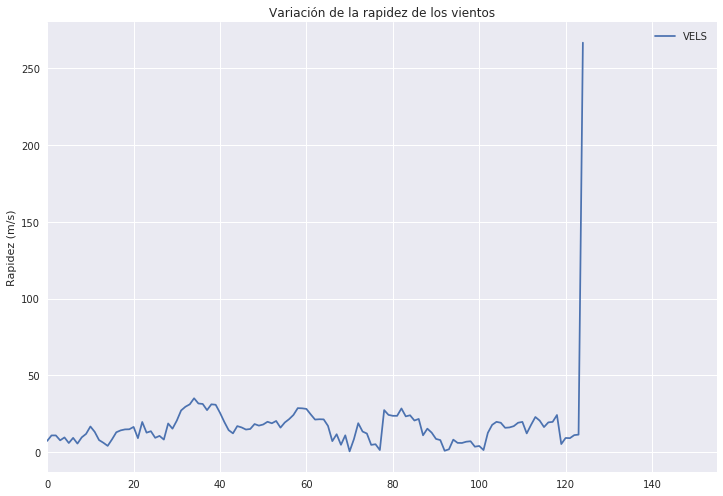

In [28]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la rapidez de los vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.savefig("VariacionDeLosVientos")
plt.show()

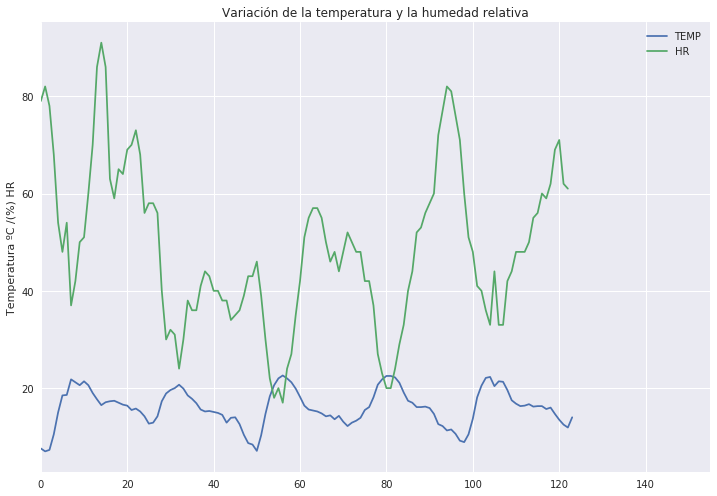

In [30]:
#Gráfica de temperatura y humedad relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la temperatura y la humedad relativa")
plt.ylabel("Temperatura ºC /(%) HR")
plt.grid(True)
plt.savefig("VariacionTemHum")
plt.show()

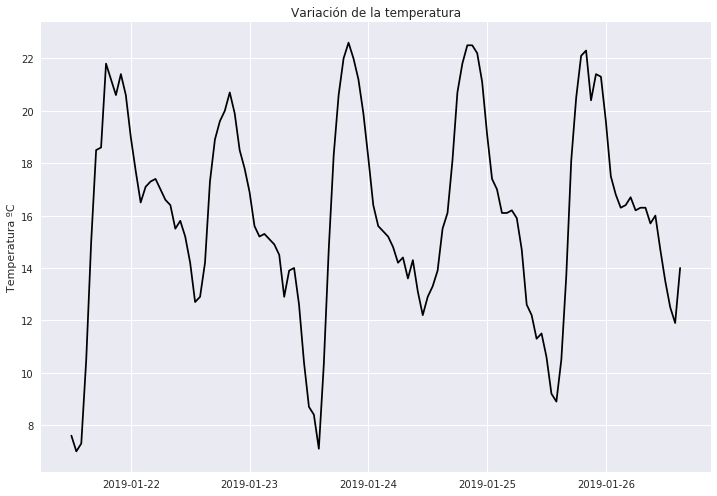

In [32]:
#Gráfica de la variación de la temperatura.
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-", color = "black")
plt.title("Variación de la temperatura")
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.savefig("VariacionTem")
plt.show()

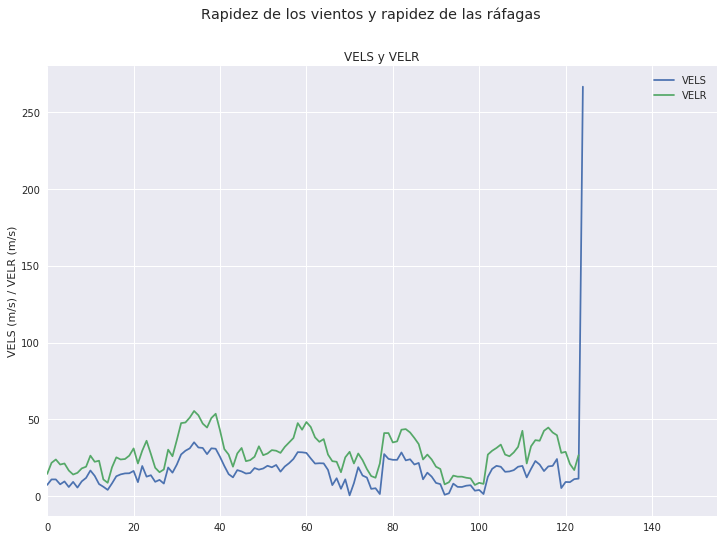

In [33]:
#Gráfica que muestre la rapidez de los vientos (VELS) y la rapidez de las ráfagas (VELR) como funciones del tiempo.
df2 = df[['VELS','VELR']]
plt.figure(); df2.plot(); plt.legend(loc='best')
plt.suptitle("Rapidez de los vientos y rapidez de las ráfagas")
plt.title("VELS y VELR")
plt.ylabel("VELS (m/s) / VELR (m/s)")
plt.grid(True)
plt.savefig("VelsVelr")
plt.show()

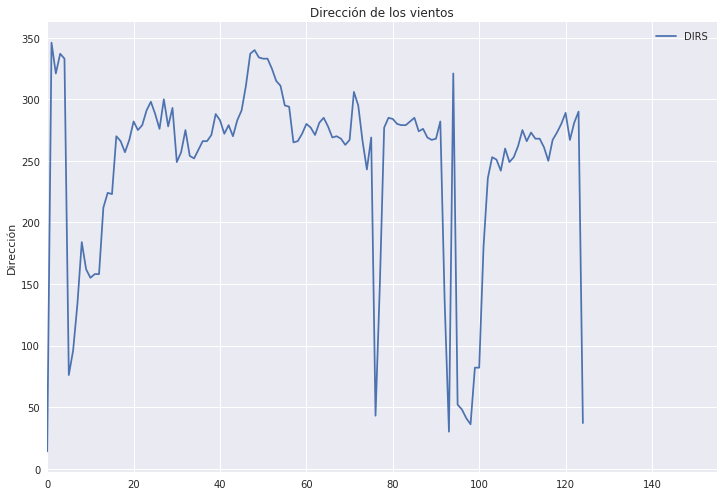

In [34]:
#Gráfica de la dirección de los vientos (DIRS) como función del tiempo.
plt.figure(); df.DIRS.plot();plt.legend(loc='best')
plt.title("Dirección de los vientos")
plt.ylabel("Dirección")
plt.grid(True)
plt.savefig("DirecVientos")
plt.show()


In [19]:
#Se puede observar que los vientos dominantes están en la dirección alrededor de los 250.
#Tal como lo indica la media
df.DIRS.mean()

248.2

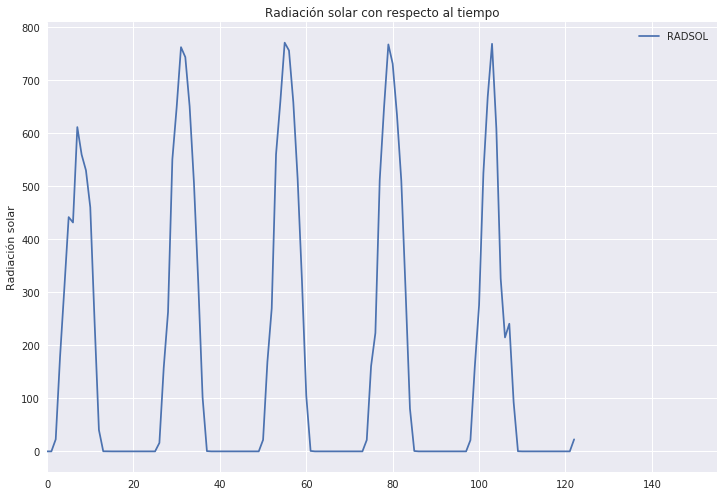

In [35]:
#Gráfica del comportamiento de la Radiación Solar como función del tiempo.
plt.figure();df.RADSOL.plot();plt.legend(loc='best')
plt.title("Radiación solar con respecto al tiempo")
plt.ylabel("Radiación solar")
plt.grid(True)
plt.savefig("RadSolar")
plt.show()

In [ ]:
#En Kino, tal como la gráfica lo muestra, puede observarse que los niveles de radiación solar aumentan y disminuyen cada cierto tiempo, casi de manera periodica, con lo que se puede concluir que en el transcurso de de esos 5 días el nivel de radiación es mayor en el día que en la noche.


In [21]:
#Lapso de la temperatura diaria
df.TEMP.max() - df.TEMP.min()

15.600000000000001

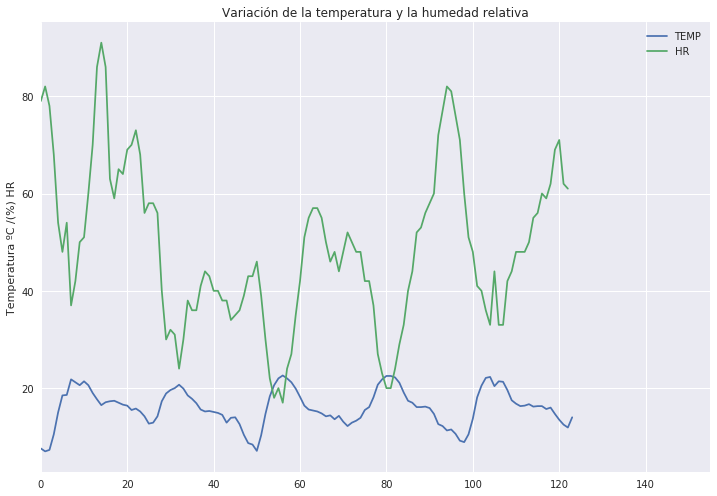

In [36]:
#Relación entre la temperatura y la humedad relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la temperatura y la humedad relativa")
plt.ylabel("Temperatura ºC /(%) HR")
plt.grid(True)
plt.savefig("VariacionTemHumRel")
plt.show()

In [ ]:
#A lo que se puede concluir en relación a la tabla de temperatura y humedad relativa es que, en la mayoría de las horas de alrededor de 5 días, la temperatura era mayor que la humedad relativa, y solo en pocas horas la humedad relativa superaba a la temperatura en el momento.


In [23]:
#Análisis de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,125.00000,125.00000,125.000000,124.000000,124.000000,123.000000,123.000000,123.0,123.000000
mean,248.20000,260.67680,17.444880,28.163710,16.071774,48.845528,1016.539837,0.0,177.134146
std,75.27573,98.36992,23.819549,11.434418,3.790200,16.473542,2.755047,0.0,257.860939
min,14.00000,11.00000,0.420000,7.200000,7.000000,17.000000,1010.800000,0.0,-1.000000
25%,252.00000,252.00000,9.150000,20.800000,13.900000,37.500000,1014.850000,0.0,-1.000000
50%,270.00000,273.00000,15.210000,27.000000,16.100000,48.000000,1016.100000,0.0,-1.000000
75%,283.00000,285.00000,20.470000,36.000000,18.675000,59.000000,1017.850000,0.0,312.500000
max,346.00000,1017.60000,266.700000,55.400000,22.600000,91.000000,1022.800000,0.0,771.300000


In [ ]:
#En el análisis de datos de la tabla, se brindan medidas como la media, la desviación estándar, el valor mínimo y el máximo, con sus respectivos cuartiles de cada columna.